<a href="https://colab.research.google.com/github/armandossrecife/my_validation3/blob/main/my_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compara os Repositórios

**Analisa os commits e issues dos repositórios para checar as  classes impactadas por ATD:**

| id | Property | RP1 | RP2 | RP3 | RP4 |
|---|---|---|---|---|---|
| 1 | name | [Cassandra](https://github.com/apache/cassandra) | [Kafka](https://github.com/apache/kafka) | [ActiveMQ](https://github.com/apache/activemq) | [Hadoop](https://github.com/apache/hadoop) |
| 2 | files | 4998 | 5648 | 5174 | 14970 |
| 3 | LOC files | 1055561 | 874543 | 466706 | 4323485 |
| 4 | java files | 4459 | 4350 | 4367 | 11811 |
| 5 | LOC java | 680827 | 649612 | 417291 | 1889967 |
| 6 | QTD commits | 29142 | 11810 | 11537 | 26945 |
| 7 | QTD releases | 297 | 65 | 85 | 374 |
| 8 | Life span | 14.53 | 12 | 14 | 14 |
| 9 | stars | 8200 | 26100 | 2200 | 13900 |
| 10 | forks | 3500 | 13000 | 1400 | 8600 |
| 11 | colaborators | 426 | 1062 | 130 | 552 |

[ATDCodeAnalyzer](https://github.com/mining-software-repositories/cassandra/blob/main/data/AnalysisCassandraRepositoryFlow.png): método para identificar classes impactadas por ATD

**Cassandra Critical Classe**s: ['StorageService.java', 'ColumnFamilyStore.java','DatabaseDescriptor.java','CompactionManager.java','StorageProxy.java','SSTableReader.java','Config.java','CassandraDaemon.java','SelectStatement.java','SinglePartitionReadCommand.java','NodeProbe.java','MessagingService.java']

**Kafka Critical Classes**: ['StreamThread.java', 'KafkaConsumer.java', 'StreamTask.java', 'Fetcher.java', 'KafkaStreams.java','KStreamImpl.java', 'KafkaProducer.java','StreamsConfig.java', 'ConsumerCoordinator.java']

**ActiveMQ Critical Classes**: ['DemandForwardingBridgeSupport.java',
'SubQueueSelectorCacheBroker.java','BrokerServiceAware.java','TransportConnector.java','BrokerService.java','TopicSubscription.java','QueueBrowserSubscription.java','Queue.java','DurableTopicSubscription.java','QueueSubscription.java','QueueDispatchSelector.java','PendingQueueMessageStoragePolicy.java','MirroredQueue.java','MessageQueue.java']

**Hadoop Critical Classes**: in progress...

# Setup do Ambiente

## Funções de apoio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

def show_pie(my_df, my_field, my_title):
  type_counts = my_df[my_field].value_counts().sort_values(ascending=False)
  type_percentages = type_counts / type_counts.sum() * 100

  plt.pie(type_percentages, labels=type_counts.index, autopct="%.1f%%")
  plt.title(my_title)
  plt.show()
  for i in range(len(type_counts)):
    print(type_counts.index[i], type_counts[i])

def find_issues_id_by_project(input_string: str, project: str) -> list[str]:
    """Finds all Project issue ID patterns in the input string.
    Args:
        input_string: The input string.
        project: The pattern related to project name, for example: CASSANDRA project name
    Returns:
        A list of project issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r"({0}-\d+)".format(project), input_string)
    # Return an empty list if no matches are found
    if not matches:
        return []
    # Convert the list of matches to a set to remove duplicates
    set_matches = set(matches)
    # Convert the set of matches back to a list
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

# TODO: corrigir a coluna hahs para hash nos arquivos .xslx
def generate_relacao_commits_issues(filtered_df, my_project):
  relacao_commit_lista_issues = []
  for index in filtered_df.index:
    if len(find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project))>0:
      elemento = filtered_df.hahs[index], find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project)
      relacao_commit_lista_issues.append(elemento)

  l_hash, l_issues = [], []
  for each in relacao_commit_lista_issues:
    issues_separados_por_virgula = ",".join(each[1])
    l_hash.append(each[0])
    l_issues.append(issues_separados_por_virgula)

  dict_relacao_commit_issues = {
    'hahs':l_hash,
    'lista_issues':l_issues
  }

  df_relacao_commit_issues = pd.DataFrame(dict_relacao_commit_issues)
  return df_relacao_commit_issues

def generate_relacao_commits_issues2(filtered_df, my_project):
  relacao_commit_lista_issues = []
  for index in filtered_df.index:
    if len(find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project))>0:
      elemento = filtered_df.hash[index], find_issues_id_by_project(input_string=filtered_df.msg[index], project=my_project)
      relacao_commit_lista_issues.append(elemento)

  l_hash, l_issues = [], []
  for each in relacao_commit_lista_issues:
    issues_separados_por_virgula = ",".join(each[1])
    l_hash.append(each[0])
    l_issues.append(issues_separados_por_virgula)

  dict_relacao_commit_issues = {
    'hash':l_hash,
    'lista_issues':l_issues
  }

  df_relacao_commit_issues = pd.DataFrame(dict_relacao_commit_issues)
  return df_relacao_commit_issues

def merge_comits_issues(df_commits_arquivos_criticos, lista_issues_architectural_impact_yes, project):
	df_commits_issues = generate_relacao_commits_issues(filtered_df=df_commits_arquivos_criticos, my_project=project)
	df_commits_issues_architectural_impact = df_commits_issues[df_commits_issues['lista_issues'].isin(lista_issues_architectural_impact_yes)]
	lista_commits_com_architectural_impact = df_commits_issues_architectural_impact.hahs.to_list()
	df__commits_only_architectural_impact = df_commits_arquivos_criticos[df_commits_arquivos_criticos['hahs'].isin(lista_commits_com_architectural_impact)]
	df_commits_issues_with_ai = pd.merge(df__commits_only_architectural_impact, df_commits_issues, how='inner')
	return df_commits_issues_with_ai

def merge_comits_issues2(df_commits_arquivos_criticos, lista_issues_architectural_impact_yes, project):
	df_commits_issues = generate_relacao_commits_issues2(filtered_df=df_commits_arquivos_criticos, my_project=project)
	df_commits_issues_architectural_impact = df_commits_issues[df_commits_issues['lista_issues'].isin(lista_issues_architectural_impact_yes)]
	lista_commits_com_architectural_impact = df_commits_issues_architectural_impact.hash.to_list()
	df__commits_only_architectural_impact = df_commits_arquivos_criticos[df_commits_arquivos_criticos['hash'].isin(lista_commits_com_architectural_impact)]
	df_commits_issues_with_ai = pd.merge(df__commits_only_architectural_impact, df_commits_issues, how='inner')
	return df_commits_issues_with_ai

## Import Dataset

[Cassandra Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_cassandra.ipynb)

[Kakfa Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_kafka.ipynb)

[ActiveMQ Analysis](https://github.com/armandossrecife/my_validation3/blob/main/my_analysis_activemq.ipynb)

In [ ]:
!rm -rf *.xlsx
!rm -rf *.zip

In [ ]:
# Dataset Cassandra
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_issues_in_commits_arquivos_criticos.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/my_issues_to_inspection_cassandra.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/my_results_inspection_cassandra.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_issues_inspected.xlsx

# Dataset Kafka
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/kafka_issues_in_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/kafka/my_issues_to_inspection_kafka.zip

# Dataset ActiveMQ
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_all_issues_in_commits.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_issues_in_commits_with_critical_classes.xlsx
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/my_issues_to_inspection_activemq.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/my_results_inspection_activemq.zip
!wget https://raw.githubusercontent.com/armandossrecife/my_validation3/main/activemq/activemq_issues_inspected.xlsx

--2023-11-04 18:31:12--  https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_commits_arquivos_criticos.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13233731 (13M) [application/octet-stream]
Saving to: ‘cassandra_commits_arquivos_criticos.xlsx’

cassandra_commits_a 100%[===================>]  12.62M  --.-KB/s    in 0.08s   

2023-11-04 18:31:13 (156 MB/s) - ‘cassandra_commits_arquivos_criticos.xlsx’ saved [13233731/13233731]

--2023-11-04 18:31:13--  https://raw.githubusercontent.com/armandossrecife/my_validation3/main/cassandra/cassandra_all_issues_in_commits.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubuserc

## Cria os Dataframes para análises

In [ ]:
# Commits with Critical Classes
df_cassandra_commits_with_critical_classes = pd.read_excel('cassandra_commits_arquivos_criticos.xlsx')
df_kafka_commits_critical_classes = pd.read_excel('kafka_commits_with_critical_classes.xlsx')
df_activemq_commits_critical_classes = pd.read_excel('activemq_commits_with_critical_classes.xlsx')

# Issues (Cassandra)
df_cassandra_issues_commits_critical_classes = pd.read_excel('cassandra_issues_in_commits_arquivos_criticos.xlsx')

# Issues (Kafka)
df_kafka_issues_commits_critical_classes = pd.read_excel('kafka_issues_in_commits_with_critical_classes.xlsx')

# Issues (ActiveMQ)
df_activemq_issues_commits_critical_classes = pd.read_excel('activemq_issues_in_commits_with_critical_classes.xlsx')

# Inspections
df_cassandra_issues_inspected = pd.read_excel('cassandra_issues_inspected.xlsx')
df_activemq_issues_inspected = pd.read_excel('activemq_issues_inspected.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Importa arquivos de inspeção

A partir dos issues com classes críticas, foram selecionadas amostras para inspeção de cada projeto.

### Importa os arquivos com os issues para inspecionar

Cada projeto possui seu conjunto de amostras para inspeção dos issues em commits com classes críticas.

In [ ]:
!rm -rf my_issues_cassandra
!rm -rf my_issues_kafka
!rm -rf my_issues_activemq

In [ ]:
!mkdir my_issues_cassandra
!unzip -q -d my_issues_cassandra my_issues_to_inspection_cassandra.zip
qtd_t1 = !ls -l my_issues_cassandra/my_issues
print(f'Qtd de issues do Cassandra para inspecionar: {len(qtd_t1)-1}')

!mkdir my_issues_kafka
!unzip -q -d my_issues_kafka my_issues_to_inspection_kafka.zip
qtd_t2 = !ls -l my_issues_kafka/my_issues
print(f'Qtd de issues do Kafka para inspecionar: {len(qtd_t2)-1}')

!mkdir my_issues_activemq
!unzip -q -d my_issues_activemq my_issues_to_inspection_activemq.zip
qtd_t3 = !ls -l my_issues_activemq/my_issues
print(f'Qtd de issues do ActiveMQ para inspecionar: {len(qtd_t3)-1}')

Qtd de issues do Cassandra para inspecionar: 226
Qtd de issues do Kafka para inspecionar: 179
Qtd de issues do ActiveMQ para inspecionar: 132


### Importa os resultados e justificativas dos issues inspecionados

Cada projeto tem seu conjunto de resultados das inspeções dos issues em commits com classes críticas selecionados.

In [ ]:
!rm -rf my_inspected_issues_cassandra
!rm -rf my_inspected_issues_activemq

In [ ]:
!mkdir my_inspected_issues_cassandra
!unzip -q -d my_inspected_issues_cassandra my_results_inspection_cassandra.zip
qtd_i1 = !ls -l my_inspected_issues_cassandra/merge_i1_i2
del qtd_i1[0]
print(f'Qtd de issues do Cassandra inspecionados: {len(qtd_i1)-1}')

Qtd de issues do Cassandra inspecionados: 226


In [ ]:
!mkdir my_inspected_issues_activemq
!unzip -q -d my_inspected_issues_activemq my_results_inspection_activemq.zip
qtd_i2 = !ls -l my_inspected_issues_activemq/my_inspection
print(f'Qtd de issues do ActiveMQ inspecionados: {len(qtd_i2)-1}')

Qtd de issues do ActiveMQ inspecionados: 132


# Comparações

## Issues nos commits com classes críticas

### Cassandra

In [ ]:
df_cassandra_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,CASSANDRA-261,Bug,Resolved,get_slice needs offset + limit,2009-06-26,2009-07-06,10 days
1,CASSANDRA-259,New Feature,Resolved,LRU cache for key positions,2009-06-26,2009-07-06,10 days
2,CASSANDRA-254,Improvement,Resolved,clean up sstable constructors,2009-06-24,2009-06-25,1 days
3,CASSANDRA-251,Improvement,Resolved,Restore ColumnSort=Time on Super Columnfamilies,2009-06-24,2009-07-06,12 days
4,CASSANDRA-248,Improvement,Resolved,Replace factory method based on explicit locks...,2009-06-21,2009-11-20,152 days
...,...,...,...,...,...,...,...
2907,CASSANDRA-18504,Improvement,Resolved,"Added support for type VECTOR<type, dimension>",2023-05-05,2023-06-22,48 days
2908,CASSANDRA-18500,New Feature,Resolved,Add guardrail for partition size,2023-05-04,2023-05-25,21 days
2909,CASSANDRA-18816,Improvement,Resolved,Add support for repair coordinator to retry me...,2023-09-01,2023-09-27,26 days
2910,CASSANDRA-18803,Bug,Resolved,Refactor validation logic in StorageService.re...,2023-08-29,2023-08-31,2 days


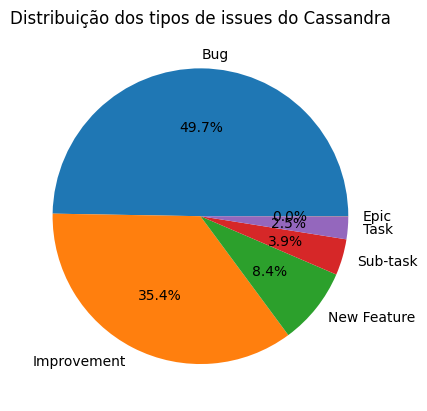

Bug 1448
Improvement 1031
New Feature 245
Sub-task 115
Task 72
Epic 1


In [ ]:
show_pie(my_df=df_cassandra_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do Cassandra')

### ActiveMQ

In [ ]:
df_activemq_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,AMQ-2199,Bug,Resolved,NullPointerException during broker start on br...,2009-04-08,2009-04-09,1 days
1,AMQ-2198,Improvement,Resolved,Allow suppression of duplicate queue subscript...,2009-04-07,2009-04-07,0 days
2,AMQ-2183,Bug,Resolved,Master/slave out of sync with multiple consume...,2009-03-25,2010-04-27,398 days
3,AMQ-2180,Improvement,Resolved,infinite networkTTL,2009-03-24,2010-06-16,449 days
4,AMQ-2149,Bug,Resolved,Shared Filesystem Master Slave: missing messages,2009-03-06,2009-05-23,78 days
...,...,...,...,...,...,...,...
475,AMQ-9153,Bug,Resolved,Fix Slow Consumer Advisory for Queue subscript...,2022-11-01,2022-11-01,0 days
476,AMQ-9262,Bug,Resolved,Composite consumers do not work properly with ...,2023-06-06,2023-06-07,1 days
477,AMQ-9257,Improvement,Resolved,Disabled expire message checking when pauseDis...,2023-05-10,2023-06-19,40 days
478,AMQ-9239,New Feature,Closed,Jakarta JMS package namespace for broker,2023-03-30,2023-08-30,153 days


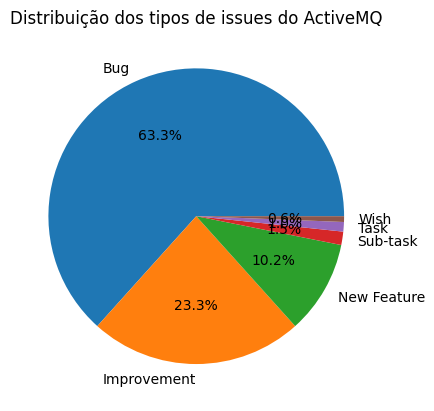

Bug 304
Improvement 112
New Feature 49
Sub-task 7
Task 5
Wish 3


In [ ]:
show_pie(my_df=df_activemq_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do ActiveMQ')

### Kafka

In [ ]:
df_kafka_issues_commits_critical_classes

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,KAFKA-1286,Sub-task,Resolved,Retry Can Block,2014-03-01,2014-03-05,4 days
1,KAFKA-1261,Sub-task,Resolved,Make metadata refresh configurable,2014-02-12,2014-02-13,1 days
2,KAFKA-1260,Sub-task,Closed,Integration Test for New Producer Part II: Bro...,2014-02-12,2014-02-27,15 days
3,KAFKA-1253,Sub-task,Resolved,Implement compression in new producer,2014-02-10,2014-03-27,45 days
4,KAFKA-1252,Sub-task,Resolved,Implement re-tries in new producer,2014-02-10,2014-02-21,11 days
...,...,...,...,...,...,...,...
934,KAFKA-15485,Improvement,Resolved,Support building with Java 21 (LTS release),2023-09-22,2023-09-25,3 days
935,KAFKA-15429,Bug,Resolved,Kafka Streams attempts to commit on a closed p...,2023-09-02,2023-09-03,1 days
936,KAFKA-15326,Improvement,Resolved,Decouple Processing Thread from Polling Thread,2023-08-09,2023-11-02,85 days
937,KAFKA-15306,Sub-task,Resolved,Integrate committed offsets logic when updatin...,2023-08-04,2023-09-18,45 days


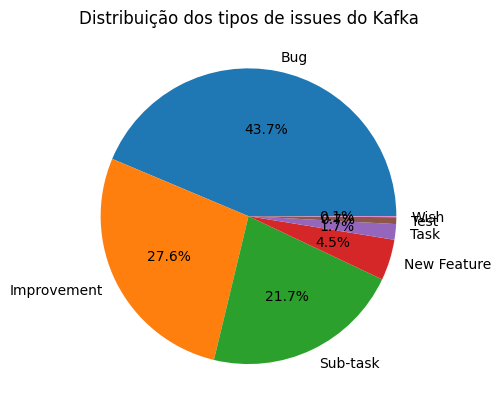

Bug 410
Improvement 259
Sub-task 204
New Feature 42
Task 16
Test 7
Wish 1


In [ ]:
show_pie(my_df=df_kafka_issues_commits_critical_classes, my_field='issue_type', my_title='Distribuição dos tipos de issues do Kafka')

## Resultado das inspeções

### Cassandra

Apenas Issues Inspecionados

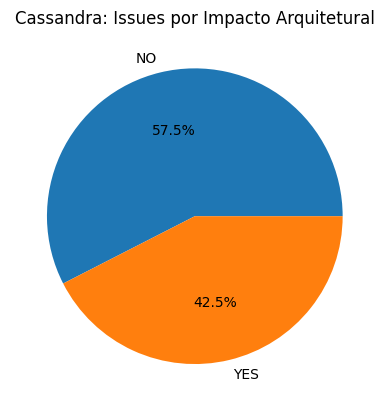

NO 130
YES 96


In [ ]:
show_pie(my_df=df_cassandra_issues_inspected, my_field='architectural_impact', my_title='Cassandra: Issues por Impacto Arquitetural')

**Issues com impacto arquitetural (Yes)**

In [ ]:
df_cii_yes = df_cassandra_issues_inspected[df_cassandra_issues_inspected.architectural_impact=='YES']
lista_issues_architectural_impact_yes = df_cii_yes.issue_key.to_list()

print('Relação entre Commits e Issues com impacto arquitetural')
df_cassandra_commits_arquivos_criticos = pd.read_excel('cassandra_commits_arquivos_criticos.xlsx')
df_merge_commits_issues_yes_ai = merge_comits_issues(df_cassandra_commits_arquivos_criticos, lista_issues_architectural_impact_yes, 'CASSANDRA')
df_merge_commits_issues_yes_ai

Relação entre Commits e Issues com impacto arquitetural


,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,lista_issues
0,9db8da81b7f269e5a8a7f896b751d482847d7082,"Add range query support, which requires using ...","['DatabaseDescriptor.java', 'ColumnFamilyStore...",29/4/2009,1456,19,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -114,6 +114,9 @@ service Cassandra ...",CASSANDRA-71
1,5cdc75d7603d1051c9d78d6ee11dd9cd44056f44,move Hints cf to SYSTEM_TABLE\npatch by jbelli...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,189,7,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -25,6 +25,8 @@\n <!-- Tables an...",CASSANDRA-235
2,682736ee5ebf33ed344abd1c6e04dc408a07bfe6,r/m recycle cf and undocumented/incomplete Loa...,"['DatabaseDescriptor.java', 'ColumnFamilyStore...",24/6/2009,2165,18,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -467,12 +467,8 @@ public class Data...",CASSANDRA-235
3,81dd8ee5f6e224c550bdf956e0bec3ec2c92cbee,use normal Table for system metadata\npatch by...,"['DatabaseDescriptor.java', 'StorageService.ja...",24/6/2009,304,8,"[\n {\n ""DatabaseDescriptor.java"": ""...","[\n ""@@ -77,7 +77,6 @@\n Keep the ...",CASSANDRA-235
4,b516ce8176c4ff90f4f1696aba9315941b67f0d0,DBManager obscures rather than clarifies what ...,"['CassandraDaemon.java', 'StorageService.java']",24/6/2009,158,7,"[\n {\n ""CassandraDaemon.java"": ""@@ ...","[\n ""@@ -107,7 +107,7 @@ public class Callo...",CASSANDRA-235
...,...,...,...,...,...,...,...,...,...
106,4f348786bd6d72f4402134a29ddb3355b1fade61,Do not remove truncated_at entry in system.loc...,['ColumnFamilyStore.java'],26/4/2023,128,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.0.29\n+ * Do not r...",CASSANDRA-18105
107,028ea02a4a877d115c748d3e179c6afb2328e430,Remove unrepaired SSTables from garbage collec...,['CompactionManager.java'],4/7/2023,92,3,"[\n {\n ""CompactionManager.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 3.11.16\n+ * Remove ...",CASSANDRA-14204
108,aac070681bd01ba796814692c3fba04de103d8b4,Disable the deprecated keyspace/table threshol...,"['Config.java', 'DatabaseDescriptor.java', 'St...",14/7/2023,359,18,"[\n {\n ""Config.java"": ""@@ -826,18 +...","[\n ""@@ -1,4 +1,5 @@\n 5.0\n+ * Disable the...",CASSANDRA-18617
109,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,In-memory index implementation with query path...,"['SinglePartitionReadCommand.java', 'StorageSe...",26/7/2023,20645,244,"[\n {\n ""SinglePartitionReadCommand....","[\n ""@@ -135,5 +135,9 @@\n <groupId>d...",CASSANDRA-18058


In [ ]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_commits_issues_yes_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,111.0,111.0
mean,2724.4,16.0
std,20524.6,34.8
min,1.0,1.0
25%,37.5,3.0
50%,128.0,6.0
75%,416.5,15.0
max,215675.0,244.0


**Issues com impacto arquitetural (No)**

In [ ]:
df_cii_no = df_cassandra_issues_inspected[df_cassandra_issues_inspected.architectural_impact=='NO']
lista_issues_architectural_impact_no = df_cii_no.issue_key.to_list()

print('Relação entre Commits e Issues sem impacto arquitetural')
df_merge_commits_issues_no_ai = merge_comits_issues(df_cassandra_commits_arquivos_criticos, lista_issues_architectural_impact_no, 'CASSANDRA')
df_merge_commits_issues_no_ai

Relação entre Commits e Issues sem impacto arquitetural


,hahs,msg,m_files,date,lines,files,diff_files,diff_modified_files,lista_issues
0,bbe89e795bbc631c2b626766840d943498304630,do not leave variables uninitialized in Consis...,['StorageService.java'],4/5/2009,22,2,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -145,16 +145,18 @@ class Consistenc...",CASSANDRA-124
1,f70a5a0c8cff203b17285494fbbd99176bbee649,clean up anticompaction code a little.\npatch ...,['ColumnFamilyStore.java'],4/5/2009,43,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1027,8 +1027,6 @@ public class Col...",CASSANDRA-78
2,fce0ee0d7b89576c7f49c2f24a90e8f26e10314a,This changeset abstracts the logic for placing...,['ColumnFamilyStore.java'],5/5/2009,126,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -402,11 +402,9 @@ public class Colu...",CASSANDRA-34
3,7779df6ce4633752a0f6768da94627aee2162103,This patch adds ColumnFamilyStore.forceflush t...,['ColumnFamilyStore.java'],5/5/2009,7,2,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -425,7 +425,7 @@ public class Colum...",CASSANDRA-34
4,f17487c541dfae03858ae703015d4049094a0f55,A make hint generation include a real timestam...,['ColumnFamilyStore.java'],5/5/2009,96,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -641,7 +641,7 @@ public class Colum...",CASSANDRA-34
...,...,...,...,...,...,...,...,...,...
142,4c85c6a4030d7d613230cd4b2204c42f941fd552,"key_cache_save_period, row_cache_save_period, ...",['Config.java'],19/9/2022,10,3,"[\n {\n ""Config.java"": ""@@ -434,19 +...","[\n ""@@ -1,4 +1,5 @@\n 4.1-alpha2\n+ * We s...",CASSANDRA-17904
143,b8494a82751ae2d31ab0f36412f7eacdcc1c3774,Log warning message on aggregation queries wit...,['SelectStatement.java'],7/2/2023,8,2,"[\n {\n ""SelectStatement.java"": ""@@ ...","[\n ""@@ -1,4 +1,5 @@\n 4.0.8\n+ * Log warni...",CASSANDRA-18219
144,b8e21fb80afa6696374292dc99a480fac9788e64,Validate the existence of a datacenter in node...,['StorageService.java'],17/5/2023,68,3,"[\n {\n ""StorageService.java"": ""@@ -...","[\n ""@@ -1,4 +1,5 @@\n 3.0.30\n+ * Validate...",CASSANDRA-14319
145,9c796dfb272daa3ce57a2dc5cbeadd9273e1ac72,Skip ColumnFamilyStore#topPartitions initializ...,['ColumnFamilyStore.java'],1/8/2023,98,3,"[\n {\n ""ColumnFamilyStore.java"": ""@...","[\n ""@@ -1,4 +1,5 @@\n 4.1.4\n+ * Skip Colu...",CASSANDRA-18697


In [ ]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_commits_issues_no_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,147.0,147.0
mean,233.6,7.8
std,544.0,12.5
min,1.0,1.0
25%,12.0,2.0
50%,68.0,3.0
75%,192.0,8.0
max,3841.0,93.0


### ActiveMQ

Apenas Issues Inspecionados

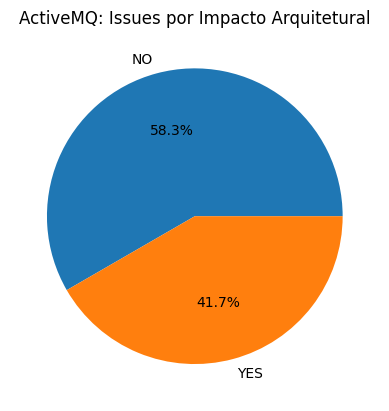

NO 77
YES 55


In [ ]:
show_pie(my_df=df_activemq_issues_inspected, my_field='architectural_impact', my_title='ActiveMQ: Issues por Impacto Arquitetural')

**Issues com Impacto Arquitetural**

In [ ]:
df_amq_ii_yes = df_activemq_issues_inspected[df_activemq_issues_inspected.architectural_impact=='YES']
lista_amq_issues_architectural_impact_yes = df_amq_ii_yes.issue_key.to_list()
print('Relação entre Commits e Issues com impacto arquitetural')
df_amq_commits_arquivos_criticos = pd.read_excel('activemq_commits_with_critical_classes.xlsx')

df_merge_amq_commits_issues_yes_ai = merge_comits_issues2(df_amq_commits_arquivos_criticos, lista_amq_issues_architectural_impact_yes, 'AMQ')
df_merge_amq_commits_issues_yes_ai

Relação entre Commits e Issues com impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,08aecbee6e9754e696f3bdf64634263dc73cb5c5,partial fix for AMQ2149|http://issues.apache.o...,18/3/2009,290,6,['Queue.java'],"['Queue.java', 'AbstractStoreCursor.java', 'Ka...","[{'Queue.java': '@@ -70,6 +70,8 @@ import org....","['@@ -70,6 +70,8 @@ import org.apache.activemq...",AMQ-2149
1,132f662209f7e25a1d9c240fdddcf61e0ed1226c,resolve AMQ-2149|https://issues.apache.org/act...,26/3/2009,326,21,['Queue.java'],"['ActiveMQMessageConsumer.java', 'TransactionC...","[{'Queue.java': '@@ -217,6 +217,10 @@ public c...","['@@ -884,7 +884,7 @@ public class ActiveMQMes...",AMQ-2149
2,e45bb0690764746dc2f6ae66d3b55efa873b4592,"further tests and fixes related to failover, t...",3/4/2009,315,13,"['DurableTopicSubscription.java', 'Queue.java']","['ActiveMQConnection.java', 'ActiveMQMessageCo...","[{'DurableTopicSubscription.java': '@@ -199,7 ...","['@@ -1838,7 +1838,9 @@ public class ActiveMQC...",AMQ-2149
3,89eecadd9da3934609e888f2b781e2602b8a9f9b,resolve https://issues.apache.org/activemq/bro...,30/10/2009,104,2,['Queue.java'],"['Queue.java', 'QueuePurgeTest.java']","[{'Queue.java': '@@ -863,8 +863,8 @@ public cl...","['@@ -863,8 +863,8 @@ public class Queue exten...",AMQ-2468
4,83128fc45b65aff89ba78596a158a01960029742,https://issues.apache.org/activemq/browse/AMQ-...,28/1/2010,236,3,['Queue.java'],"['Queue.java', 'SystemUsage.java', 'JmsTimeout...","[{'Queue.java': '@@ -27,15 +27,19 @@ import ja...","['@@ -27,15 +27,19 @@ import java.util.Iterato...",AMQ-2507
5,a0d2282a418470c4256193f2085a0c3c46d2b67e,resolve https://issues.apache.org/activemq/bro...,15/4/2010,340,6,['Queue.java'],"['BaseDestination.java', 'Queue.java', 'Topic....","[{'Queue.java': '@@ -556,16 +556,16 @@ public ...","['@@ -18,6 +18,8 @@ package org.apache.activem...",AMQ-2668
6,4e8143711a8b4640485bb78f94c52b4f4b8bfa4f,https://issues.apache.org/activemq/browse/AMQ-...,7/5/2010,17,2,['DemandForwardingBridgeSupport.java'],"['DemandForwardingBridgeSupport.java', 'Duplex...",[{'DemandForwardingBridgeSupport.java': '@@ -4...,"['@@ -473,7 +473,8 @@ public abstract class De...",AMQ-2706
7,9c47f6b38548d089fe05a63ed37d9ca81fc91376,https://issues.apache.org/activemq/browse/AMQ-...,9/6/2010,117,2,['DurableTopicSubscription.java'],"['DurableTopicSubscription.java', 'DurableSubs...","[{'DurableTopicSubscription.java': '@@ -72,6 +...","['@@ -72,6 +72,10 @@ public class DurableTopic...",AMQ-2665
8,bb17d6151665c040e5960598403168f7bf5669ec,https://issues.apache.org/activemq/browse/AMQ-...,10/6/2010,4,1,['DurableTopicSubscription.java'],['DurableTopicSubscription.java'],"[{'DurableTopicSubscription.java': '@@ -72,11 ...","['@@ -72,11 +72,11 @@ public class DurableTopi...",AMQ-2665
9,11705e70b4395c25f275ae448efc12b0fec8d501,https://issues.apache.org/activemq/browse/AMQ-...,20/7/2010,254,16,['BrokerService.java'],"['BrokerContext.java', 'BrokerContextAware.jav...","[{'BrokerService.java': '@@ -34,10 +34,12 @@ i...","['@@ -0,0 +1,32 @@\n+/**\n+ * Licensed to the ...",AMQ-2702


In [ ]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_amq_commits_issues_yes_ai.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,57.0,57.0
mean,329.6,16.6
std,657.8,74.8
min,4.0,1.0
25%,46.0,2.0
50%,181.0,4.0
75%,327.0,12.0
max,4738.0,570.0


**Issues sem impacto arquitetural**

In [ ]:
df_amq_ii_no = df_activemq_issues_inspected[df_activemq_issues_inspected.architectural_impact=='NO']
lista_amq_issues_architectural_impact_no = df_amq_ii_no.issue_key.to_list()
print('Relação entre Commits e Issues sem impacto arquitetural')

df_merge_amq_commits_issues_no = merge_comits_issues2(df_amq_commits_arquivos_criticos, lista_amq_issues_architectural_impact_no, 'AMQ')
df_merge_amq_commits_issues_no

Relação entre Commits e Issues sem impacto arquitetural


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,lista_issues
0,07b6a38336a62913d42817a89cdc821a89419b7f,AMQ-2053 introduce methods to remove (closed) ...,7/1/2009,164,12,['Queue.java'],"['AbstractRegion.java', 'DestinationFactory.ja...","[{'Queue.java': '@@ -850,9 +850,9 @@ public cl...","['@@ -203,7 +203,7 @@ public abstract class Ab...",AMQ-2053
1,3b08860f10a12b8753e24756cf66f4a8d66b270e,resolve https://issues.apache.org/activemq/bro...,29/1/2009,12202,129,['Queue.java'],"['pom.xml', 'ActiveMQConnection.java', 'Active...","[{'Queue.java': '@@ -280,7 +280,7 @@ public cl...","['@@ -659,7 +659,7 @@\n <tas...",AMQ-2087
2,184761a119ae684a910bed41bc0f81bc2334fdb4,"tidy up redispatch logic a little more, resolv...",19/2/2009,149,3,['Queue.java'],"['ActiveMQMessageConsumer.java', 'Queue.java',...","[{'Queue.java': '@@ -336,8 +336,7 @@ public cl...","['@@ -630,7 +630,7 @@ public class ActiveMQMes...",AMQ-2128
3,62e1abfb902ac48741481bd0d80783ecef9e79a4,fix for https://issues.apache.org/activemq/bro...,11/5/2009,122,7,['BrokerService.java'],"['BrokerService.java', 'ManagementContext.java...","[{'BrokerService.java': '@@ -31,12 +31,13 @@ i...","['@@ -31,12 +31,13 @@ import java.util.concurr...",AMQ-2245
4,dbe847e0dade437ba678299f62e899f61b95a3e9,resolve https://issues.apache.org/activemq/bro...,9/7/2009,137,3,['Queue.java'],"['Queue.java', 'ExpiredMessagesTest.java', 'Ex...","[{'Queue.java': '@@ -205,7 +205,9 @@ public cl...","['@@ -205,7 +205,9 @@ public class Queue exten...",AMQ-2322
...,...,...,...,...,...,...,...,...,...,...
78,596ee316874894ad0342475d8f242913bd507cd1,AMQ-9153: Fix slow consumer advisory for queue...,1/11/2022,53,2,['Queue.java'],"['Queue.java', 'AdvisoryTests.java']","[{'Queue.java': '@@ -2210,6 +2210,16 @@ public...","['@@ -2210,6 +2210,16 @@ public class Queue ex...",AMQ-9153
79,76f612600d291dfb4152b90a3dbfc9ce8ea2e1a5,AMQ-9157 - Add a new optional advisory for dis...,3/11/2022,273,15,['TopicSubscription.java'],"['AdvisoryBroker.java', 'Broker.java', 'Broker...","[{'TopicSubscription.java': '@@ -701,6 +701,7 ...","['@@ -488,6 +488,27 @@ public class AdvisoryBr...",AMQ-9157
80,c140d73feca4a18044701ebf1df2859ec8c33207,AMQ-9157 - Include consumer id as part of Disp...,11/11/2022,44,12,['TopicSubscription.java'],"['AdvisoryBroker.java', 'Broker.java', 'Broker...","[{'TopicSubscription.java': '@@ -702,7 +702,7 ...","['@@ -489,8 +489,8 @@ public class AdvisoryBro...",AMQ-9157
81,ed924cddac90b96bdc47b215852a68155d818bcd,AMQ-9202 - Make sure Reentrant locks are acqui...,1/2/2023,86,3,['Queue.java'],"['Queue.java', 'MessageDatabase.java', 'Abstra...","[{'Queue.java': '@@ -1299,8 +1299,8 @@ public ...","['@@ -1299,8 +1299,8 @@ public class Queue ext...",AMQ-9202


In [ ]:
print('Dados estatísticos das linhas modificadas e arquivos modificados nos commits')
round(df_merge_amq_commits_issues_no.describe(), 1)

Dados estatísticos das linhas modificadas e arquivos modificados nos commits


,lines,files
count,83.0,83.0
mean,295.9,6.6
std,1334.6,14.9
min,1.0,1.0
25%,27.5,2.0
50%,92.0,3.0
75%,223.0,7.0
max,12202.0,129.0


## Kafka

Apenas Issues Inspecionados

In [1]:
# in progress...